# Lab5 CNNs

## By Zekai Wang
## Master of Applied Statistics and Data Analytics
## 11/22/2019

##  Business Understanding

As machine learning and deep learning algorithms have been more widely used in the biomedical field, people are getting more and more accurate in the diagnosis of certain diseases such as breast cancer and malaria. Both patients and doctors will benefit from this precise model. To be more specific, for individuals, many people in the world have a smart phone, and if smart diagnostic technology is installed on the phone, then everyone can shoot, scan and analyze their own sample images, and know their own risk of disease for the first time. In additon, for doctors and hospitals, Deep learning algorithms can provide doctors with enough valuable references, save more manpower and resources, and make diagnosis and treatment more popular, more civilian, and faster. In other words, deep learning algorithms have more accurate observations, more faster recovery and never rest. However, what doctors have seen, known, and understood for many years cannot be also completely translated into data and become machine learning data. Therefore, when hospitals combine algorithms with doctors, they can optimize treatment results and costs.

From this perspective, I selected a blood cell image dataset from kaggle for this exploring image data lab assignment. To be more specific, the goal for this dataset is to figure out the difference of features between four boold cell subtype: Neutrophil, Monocyte, Eosinophil, and Lymphocute and classify these subtype as accurate as possible.

## Metrics

The four types of pictures in this dataset represent：Neutrophils, Monocyte, Eosinophil, and Lymphocute. All four belong to white blood cells. Each type of white blood cell plays a different role in the human immune system. Therefore, misclassification of any one type of white blood cell can have serious medical consequences. From this perspective, I need to be care of all of types equally and also my dataset is balanced, so accuracy would be the best metrics for my business case. 

## Split
The original dataset from kaggle contains 12,444 augmented images of blood cells (JPEG), which contains 3,123 Neutrophils, 3,098 Monocyte, 3,120 Eosinophil, 3,103 Lymphocute. Since the dataset is large enough and also balanced , I used 80/20 split.

Data Source: https://www.kaggle.com/paultimothymooney/blood-cells

In [55]:
import PIL
from PIL import Image
import numpy as np
from matplotlib import image
from skimage import io
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage.io import imshow


import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model

In [2]:
#Find the different fold for each type of cell
import os
imagelist = os.listdir('blood-cells/dataset2-master/images/TRAIN/')
imagelist.remove('.DS_Store')
imagelist

['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']

In [41]:
#https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html
#import all images from those four files
#resize original image into 150 * 150
image_list = list()
image_count = list()
image_name = list()
for i in imagelist:
    imagelist2 = os.listdir('blood-cells/dataset2-master/images/TRAIN/'+ i +'/')
    image_count.append(len(imagelist2))
    for j in imagelist2:
        image_name.append(i)
        img = io.imread('blood-cells/dataset2-master/images/TRAIN/'+ i + '/' + j, as_gray=True)
        img_resized = resize(img, (60, 60),anti_aliasing=True)
        img_flatten = img_resized.flatten()
        image_list.append(img_flatten)

In [42]:
for i in imagelist:
    imagelist3 = os.listdir('blood-cells/dataset2-master/images/TEST/'+ i +'/')
    image_count.append(len(imagelist2))
    for j in imagelist3:
        image_name.append(i)
        img = io.imread('blood-cells/dataset2-master/images/TEST/'+ i + '/' + j, as_gray=True)
        img_resized = resize(img, (60, 60),anti_aliasing=True)
        img_flatten = img_resized.flatten()
        image_list.append(img_flatten)

In [173]:
for i in imagelist:
    imagelist3 = os.listdir('blood-cells/dataset2-master/images/TEST/'+ i +'/')
    image_count.append(len(imagelist3))

In [43]:
#convert list into numpy array
image_nparray = np.array(image_list)

In [175]:
#Basic information of image_nparray
print('Images sample:',image_nparray.shape[0])
print('Numpy array size: {} by {}'.format(image_nparray.shape[0],image_nparray.shape[1]))
print('Original image size: {} by {}'.format(img.shape[0],img.shape[1]))
print('Resized image size: {} by {}'.format(img_resized.shape[0],img_resized.shape[1]))
print('Cell type:',imagelist[0],':',image_count[0]+image_count[8]
                            ,',',imagelist[1],':',image_count[1]+image_count[9]
                            ,',',imagelist[2],':',image_count[2]+image_count[10]
                            ,',',imagelist[3],':',image_count[3]+image_count[11])

Images sample: 12444
Numpy array size: 12444 by 3600
Original image size: 240 by 320
Resized image size: 60 by 60
Cell type: NEUTROPHIL : 3123 , MONOCYTE : 3098 , EOSINOPHIL : 3120 , LYMPHOCYTE : 3103


[2499, 2478, 2497, 2483, 2483, 2483, 2483, 2483]

In [45]:
#Get images randomly
random_array = np.random.randint(0, 12443, size=18, dtype='l')
random_array
random_title = list()
for i in random_array:
    random_title.append(image_name[i])

print(random_title)

['MONOCYTE', 'EOSINOPHIL', 'NEUTROPHIL', 'NEUTROPHIL', 'NEUTROPHIL', 'LYMPHOCYTE', 'NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'NEUTROPHIL', 'NEUTROPHIL']


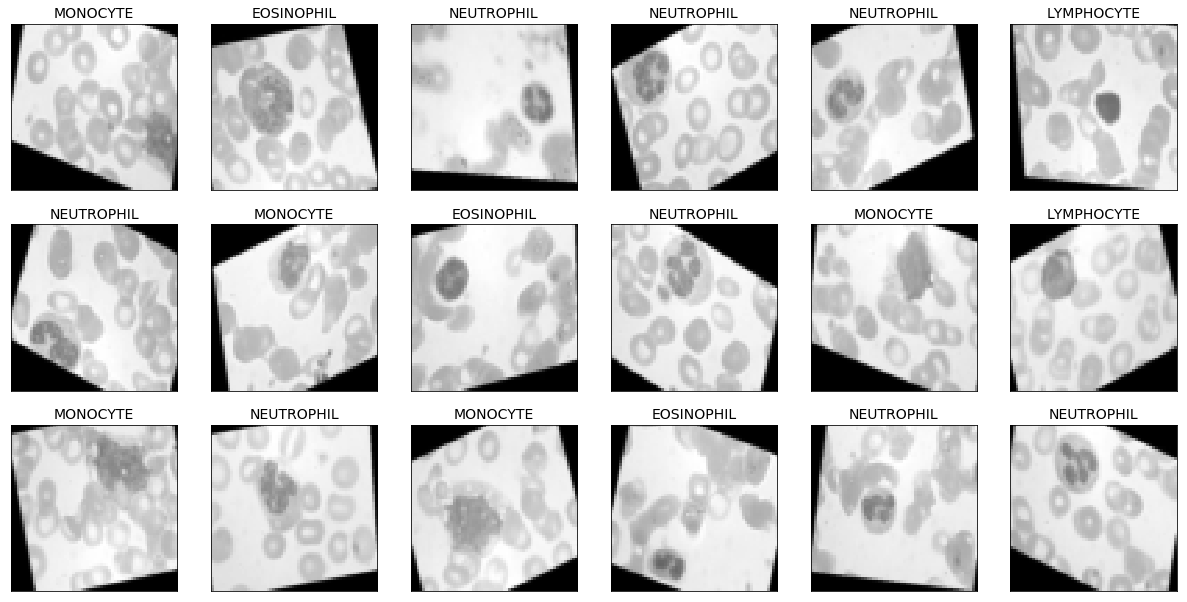

In [46]:
# plotting function
from matplotlib import pyplot as plt
def plot_gallery_random(images,title, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.7 * n_row))
    plt.subplots_adjust(bottom=0, left=0.2, right=2, top=1, hspace=.1)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[random_array[i]].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(title[i], size=14)
        plt.xticks(())
        plt.yticks(())

plot_gallery_random(image_nparray,random_title, 60, 60) # defaults to showing a 3 by 6 subset of the faces

In [80]:
image_class = list()
for i in image_name:
    if i=='EOSINOPHIL':
        image_class.append(0)
    elif i=='LYMPHOCYTE':
        image_class.append(1)
    elif i=='MONOCYTE':
        image_class.append(2)
    elif i=='NEUTROPHIL':
        image_class.append(3)

image_class_array = np.array(image_class)
X_train, X_test, y_train, y_test = train_test_split(image_nparray, image_class_array, 
                                                    test_size=0.2,random_state=1)
X_train = np.expand_dims(X_train.reshape((-1,60,60)), axis=3)
X_test = np.expand_dims(X_test.reshape((-1,60,60)), axis=3)
# the image data has been resized to (samples,image_rows,image_cols,image_channels)

# and one hot encoding the output values
y_train_ohe = keras.utils.to_categorical(y_train, 4)
y_test_ohe = keras.utils.to_categorical(y_test, 4)

## Data Expansion

Since it is a cell images dataset, it dosen't matter to do horizontal and vertical flip and random rotation. However, because the size of images are not large (60 * 60), I didn't do width, height and other shift.

In [81]:

#yield batch of images data
#never show the data twice, so it prevent the overfitting
datagen = ImageDataGenerator(
    featurewise_center=False, # whether let mean be 0 for each image
    samplewise_center=False, # whether let mean be 0 for all sample you select
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.0, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.0,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)

datagen.fit(X_train)

idx = 0

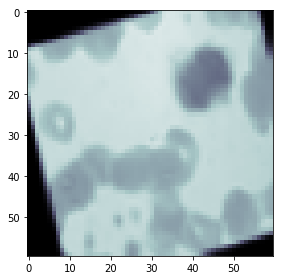

In [64]:
tmps = datagen.flow(X_train, y_train_ohe, batch_size=1)

for tmp in tmps:
    imshow(tmp[0].squeeze(),cmap='bone')
#    plt.title(classes[np.argmax(tmp[1])])
    break

In [161]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    y_test_categorical = list()
    yhat_categorical = list()
    for i in y_test:
        if i == 0:
            y_test_categorical.append('Eosinophil')
        elif i == 1:
            y_test_categorical.append('Lymphocyte')
        elif i == 2:
            y_test_categorical.append('Monocyte')
        elif i == 3:
            y_test_categorical.append('Neutrophil')
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    for i in yhat:
        if i == 0:
            yhat_categorical.append('Eosinophil')
        elif i == 1:
            yhat_categorical.append('Lymphocyte')
        elif i == 2:
            yhat_categorical.append('Monocyte')
        elif i == 3:
            yhat_categorical.append('Neutrophil')
            
    ax = plt.subplot()
    acc = mt.accuracy_score(np.array(y_test_categorical),np.array(yhat_categorical))
    labels = ['Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    cm = mt.confusion_matrix(np.array(y_test_categorical),np.array(yhat_categorical), labels)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', ax = ax)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.title(title_text+'{:.4f}'.format(acc))
    

## CNNs
In this part, I use Resnet and Xeception CNNs. For each CNNs, I changed size of filters and the number of layers to create total 4 differnet CNNs. Then, I used approximating z-score test to compare the model. (Notes: since it is multiple hypothesis test, the CI is less than 95%)

In [142]:
%%time
img_wh=60
l2_lambda = 0.0001
NUM_CLASSES = 4
# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model

input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()


Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 60, 60, 32)   320         input_20[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_64 (MaxPooling2D) (None, 30, 30, 32)   0           conv2d_69[0][0]                  
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 30, 30, 32)   9248        max_pooling2d_64[0][0]           
___________________________________________________________________________________________

In [143]:
%%time
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
# resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
#                       steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                       epochs=50, verbose=1,
#                       validation_data=(X_test,y_test_ohe),
#                       callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
#                      )

#filepath = "./weight_tr5.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

history1 = resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                      epochs=100, verbose=1,
                      validation_data=(X_test,y_test_ohe)
#                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/100
78/78 [==============================] - 22s 277ms/step - loss: 1.5584 - accuracy: 0.2559 - val_loss: 1.4258 - val_accuracy: 0.2547
Epoch 2/100
78/78 [==============================] - 22s 279ms/step - loss: 1.4244 - accuracy: 0.2552 - val_loss: 1.4175 - val_accuracy: 0.3158
Epoch 3/100
78/78 [==============================] - 22s 285ms/step - loss: 1.3757 - accuracy: 0.3336 - val_loss: 1.2552 - val_accuracy: 0.4223
Epoch 4/100
78/78 [==============================] - 22s 285ms/step - loss: 1.2209 - accuracy: 0.4317 - val_loss: 1.1428 - val_accuracy: 0.4966
Epoch 5/100
78/78 [==============================] - 22s 286ms/step - loss: 1.1539 - accuracy: 0.4652 - val_loss: 1.1031 - val_accuracy: 0.5054
Epoch 6/100
78/78 [==============================] - 22s 283ms/step - loss: 1.1261 - accuracy: 0.4837 - val_loss: 1.0670 - val_accuracy: 0.5283
Epoch 7/100
78/78 [==============================] - 22s 282ms/step - loss: 1.0901 - accuracy: 0.4896 - val_loss: 1.0270 - val_accuracy:

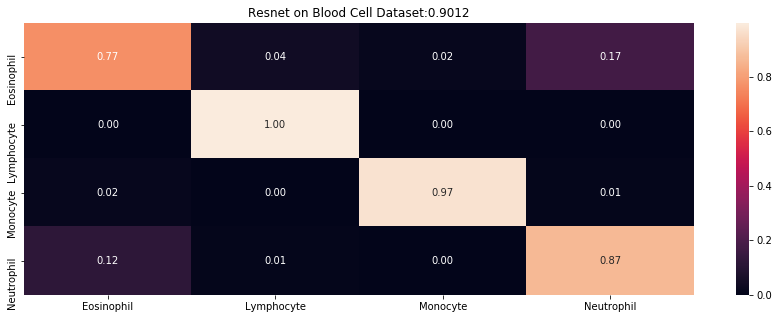

In [162]:
summarize_net(resnet, X_test, y_test, title_text='Resnet on Blood Cell Dataset:')

Based on the confusion matrix, the performance of Lymphocyte and Monocyte is perfect, accuracy is almost 100%. Eosinophil and Neutrophil relatively mix up, but still have a good performance.

Text(0.5, 1.0, 'MSE Loss')

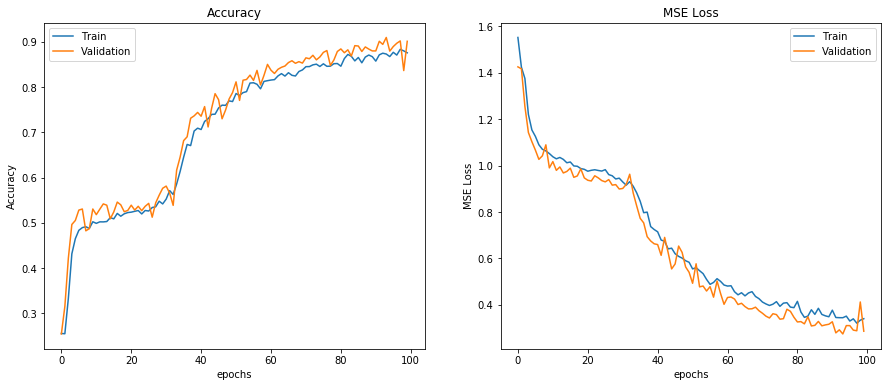

In [145]:
%matplotlib inline

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
p1, = plt.plot(history1.history['accuracy'])
p2, = plt.plot(history1.history['val_accuracy'])
plt.legend([p1, p2], ['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy')

#plt.ylabel('Recall %')
#plt.title('Training')
#plt.subplot(2,2,2)
#plt.plot(history.history['val_recall_21'])
#plt.title('Validation')

plt.subplot(1,2,2)
p3, = plt.plot(history1.history['loss'])
p4, = plt.plot(history1.history['val_loss'])
plt.legend([p3, p4], ['Train', 'Validation'])
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.title('MSE Loss')

In [146]:
%%time
#Resnet 2.0, 16 filters
img_wh=60
l2_lambda = 0.0001
NUM_CLASSES = 4
# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model

input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=16,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=16,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=16,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=16,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet2 = Model(inputs=input_holder,outputs=x)

resnet2.summary()


Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 60, 60, 16)   160         input_21[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_67 (MaxPooling2D) (None, 30, 30, 16)   0           conv2d_74[0][0]                  
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 30, 30, 16)   2320        max_pooling2d_67[0][0]           
___________________________________________________________________________________________

In [147]:
%%time
resnet2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
# resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
#                       steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                       epochs=50, verbose=1,
#                       validation_data=(X_test,y_test_ohe),
#                       callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
#                      )

#filepath = "./weight_tr5.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

history2 = resnet2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                      epochs=100, verbose=1,
                      validation_data=(X_test,y_test_ohe)
#                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/100
78/78 [==============================] - 17s 220ms/step - loss: 1.5017 - accuracy: 0.2536 - val_loss: 1.4139 - val_accuracy: 0.2640
Epoch 2/100
78/78 [==============================] - 17s 221ms/step - loss: 1.3932 - accuracy: 0.2968 - val_loss: 1.2821 - val_accuracy: 0.4231
Epoch 3/100
78/78 [==============================] - 18s 227ms/step - loss: 1.1937 - accuracy: 0.4264 - val_loss: 1.1578 - val_accuracy: 0.4970
Epoch 4/100
78/78 [==============================] - 18s 230ms/step - loss: 1.1141 - accuracy: 0.4700 - val_loss: 1.0578 - val_accuracy: 0.5050
Epoch 5/100
78/78 [==============================] - 18s 232ms/step - loss: 1.0794 - accuracy: 0.4960 - val_loss: 1.0350 - val_accuracy: 0.5094
Epoch 6/100
78/78 [==============================] - 18s 229ms/step - loss: 1.0427 - accuracy: 0.5176 - val_loss: 1.0187 - val_accuracy: 0.5115
Epoch 7/100
78/78 [==============================] - 18s 230ms/step - loss: 1.0219 - accuracy: 0.5218 - val_loss: 0.9717 - val_accuracy:

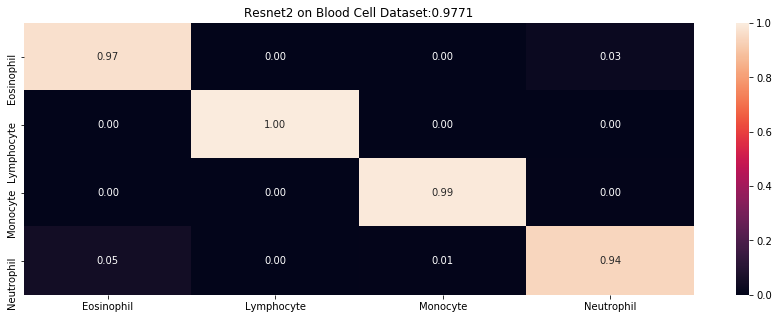

In [163]:
summarize_net(resnet2, X_test, y_test, title_text='Resnet2 on Blood Cell Dataset:')

Based on the Resnet2 confusion matrix, all classes have a perfect performance.

Text(0.5, 1.0, 'MSE Loss')

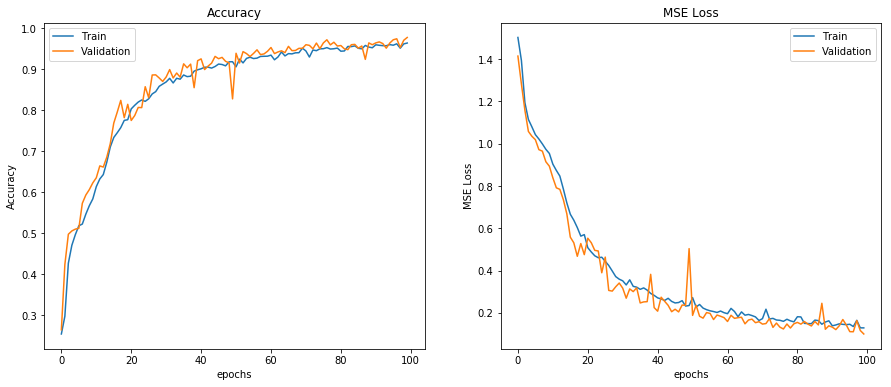

In [149]:
%matplotlib inline

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
p1, = plt.plot(history2.history['accuracy'])
p2, = plt.plot(history2.history['val_accuracy'])
plt.legend([p1, p2], ['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy')

#plt.ylabel('Recall %')
#plt.title('Training')
#plt.subplot(2,2,2)
#plt.plot(history.history['val_recall_21'])
#plt.title('Validation')

plt.subplot(1,2,2)
p3, = plt.plot(history2.history['loss'])
p4, = plt.plot(history2.history['val_loss'])
plt.legend([p3, p4], ['Train', 'Validation'])
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.title('MSE Loss')

In [204]:
#reject H0
z = 1.96
eval1 = 0.9771
eval2 = 0.9012
e1 = eval1 - eval2
acc12 = (eval1 + eval2)/2
std12 = np.sqrt(acc12*(1-acc12)/(X_test.shape[0]*2))
mean1 = np.mean(e1)
print(e1-z*std12,e1+z*std12)

0.06925910829811058 0.08254089170188936
CI for clf1 is: 0.01328178340377878


In [150]:
# Xception style architecture
from keras.layers import SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model

l2_lambda = 0.000001



input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)


x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = SeparableConv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])

x = SeparableConv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])


x = Activation("relu")(x_split)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES,activation="softmax")(x)

xception = Model(inputs=input_holder,outputs=x)

xception.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 60, 60, 32)   320         input_22[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_70 (MaxPooling2D) (None, 30, 30, 32)   0           conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 30, 30, 32)   9248        max_pooling2d_70[0][0]           
___________________________________________________________________________________________

In [151]:
%%time
# speed up by training by not using augmentation, perhaps there are faster ways??
xception.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

history3 = xception.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
            epochs=100, verbose=1,
            validation_data=(X_test,y_test_ohe)
#            callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
            )

Epoch 1/100
78/78 [==============================] - 17s 223ms/step - loss: 1.5306 - accuracy: 0.2511 - val_loss: 1.3875 - val_accuracy: 0.2527
Epoch 2/100
78/78 [==============================] - 18s 226ms/step - loss: 1.3878 - accuracy: 0.2545 - val_loss: 1.3863 - val_accuracy: 0.2559
Epoch 3/100
78/78 [==============================] - 18s 230ms/step - loss: 1.3865 - accuracy: 0.2598 - val_loss: 1.3863 - val_accuracy: 0.2616
Epoch 4/100
78/78 [==============================] - 18s 231ms/step - loss: 1.3874 - accuracy: 0.2474 - val_loss: 1.3860 - val_accuracy: 0.2664
Epoch 5/100
78/78 [==============================] - 18s 230ms/step - loss: 1.3866 - accuracy: 0.2574 - val_loss: 1.3871 - val_accuracy: 0.2503
Epoch 6/100
78/78 [==============================] - 18s 231ms/step - loss: 1.3864 - accuracy: 0.2533 - val_loss: 1.3862 - val_accuracy: 0.2475
Epoch 7/100
78/78 [==============================] - 18s 230ms/step - loss: 1.3868 - accuracy: 0.2537 - val_loss: 1.3861 - val_accuracy:

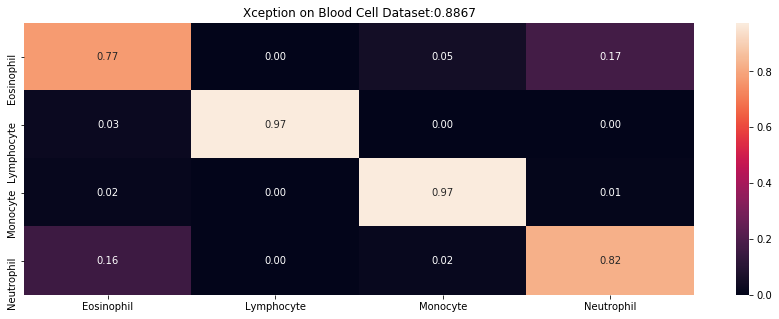

In [164]:
summarize_net(xception, X_test, y_test, title_text='Xception on Blood Cell Dataset:')

Based on the Xception confusion matrix, the performance of Lymphocyte and Monocyte is perfect, accuracy is almost 100%. Eosinophil and Neutrophil relatively mix up, but still have a good performance.

Text(0.5, 1.0, 'MSE Loss')

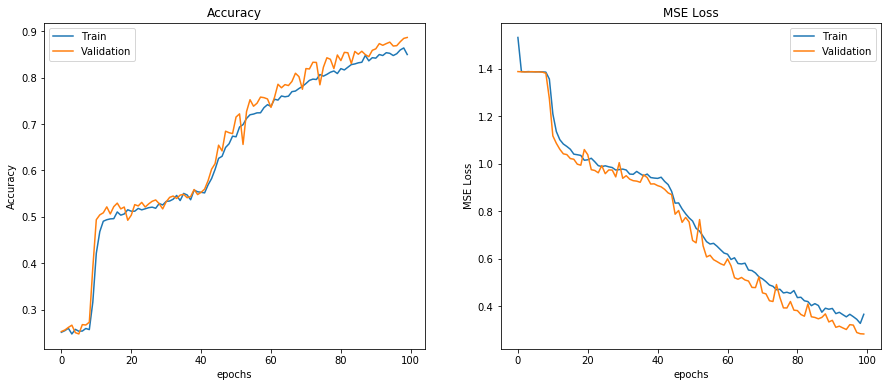

In [165]:
%matplotlib inline

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
p1, = plt.plot(history3.history['accuracy'])
p2, = plt.plot(history3.history['val_accuracy'])
plt.legend([p1, p2], ['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy')

#plt.ylabel('Recall %')
#plt.title('Training')
#plt.subplot(2,2,2)
#plt.plot(history.history['val_recall_21'])
#plt.title('Validation')

plt.subplot(1,2,2)
p3, = plt.plot(history3.history['loss'])
p4, = plt.plot(history3.history['val_loss'])
plt.legend([p3, p4], ['Train', 'Validation'])
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.title('MSE Loss')

In [166]:
#half filters and one more layer
l2_lambda = 0.000001
input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=16,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=16,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)


x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = SeparableConv2D(filters=16,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])

x = SeparableConv2D(filters=16,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])

x = SeparableConv2D(filters=16,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])



x = Activation("relu")(x_split)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES,activation="softmax")(x)

xception2 = Model(inputs=input_holder,outputs=x)

xception2.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 60, 60, 16)   160         input_23[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_73 (MaxPooling2D) (None, 30, 30, 16)   0           conv2d_83[0][0]                  
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 30, 30, 16)   2320        max_pooling2d_73[0][0]           
___________________________________________________________________________________________

In [168]:
%%time
# speed up by training by not using augmentation, perhaps there are faster ways??
xception2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

history4 = xception2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
            epochs=100, verbose=1,
            validation_data=(X_test,y_test_ohe)
#            callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
            )

Epoch 1/100
78/78 [==============================] - 11s 144ms/step - loss: 1.4525 - accuracy: 0.2488 - val_loss: 1.3869 - val_accuracy: 0.2346
Epoch 2/100
78/78 [==============================] - 11s 138ms/step - loss: 1.3877 - accuracy: 0.2551 - val_loss: 1.3865 - val_accuracy: 0.2535
Epoch 3/100
78/78 [==============================] - 11s 140ms/step - loss: 1.3858 - accuracy: 0.2642 - val_loss: 1.3843 - val_accuracy: 0.2451
Epoch 4/100
78/78 [==============================] - 11s 143ms/step - loss: 1.3814 - accuracy: 0.2806 - val_loss: 1.3696 - val_accuracy: 0.3262
Epoch 5/100
78/78 [==============================] - 11s 146ms/step - loss: 1.3328 - accuracy: 0.3318 - val_loss: 1.2092 - val_accuracy: 0.4118
Epoch 6/100
78/78 [==============================] - 11s 145ms/step - loss: 1.1633 - accuracy: 0.4432 - val_loss: 1.0892 - val_accuracy: 0.4845
Epoch 7/100
78/78 [==============================] - 11s 145ms/step - loss: 1.1071 - accuracy: 0.4735 - val_loss: 1.0522 - val_accuracy:

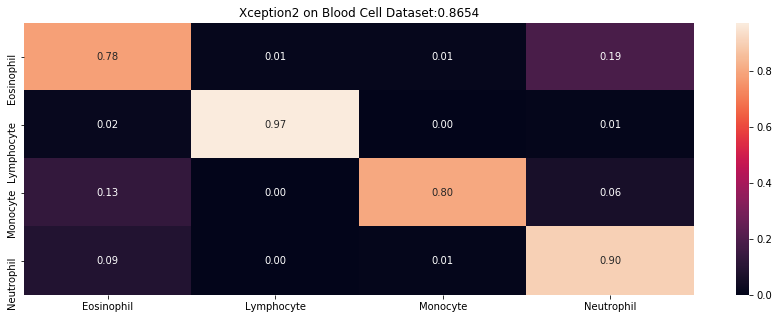

In [169]:
summarize_net(xception2, X_test, y_test, title_text='Xception2 on Blood Cell Dataset:')

Based on the Xception confusion matrix, the performance of Lymphocyte Neutrophil is perfect, accuracy is almost 100%. Eosinophil and Monocute relatively mix up, but still have a good performance.

Text(0.5, 1.0, 'MSE Loss')

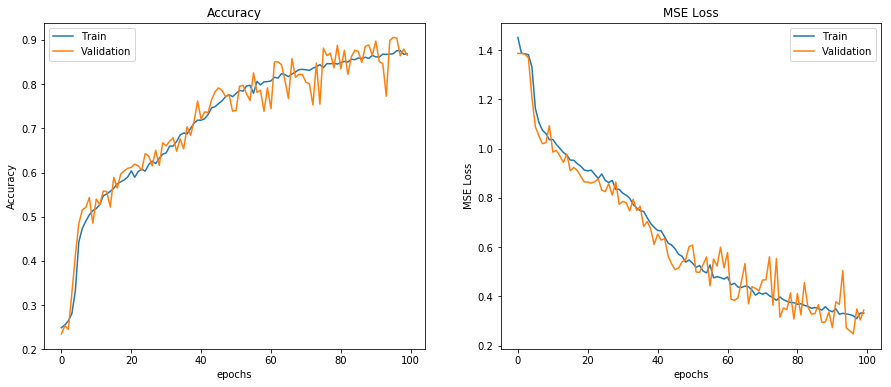

In [170]:
%matplotlib inline

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
p1, = plt.plot(history4.history['accuracy'])
p2, = plt.plot(history4.history['val_accuracy'])
plt.legend([p1, p2], ['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy')

#plt.ylabel('Recall %')
#plt.title('Training')
#plt.subplot(2,2,2)
#plt.plot(history.history['val_recall_21'])
#plt.title('Validation')

plt.subplot(1,2,2)
p3, = plt.plot(history4.history['loss'])
p4, = plt.plot(history4.history['val_loss'])
plt.legend([p3, p4], ['Train', 'Validation'])
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.title('MSE Loss')

In [205]:
#reject H0
z = 1.96
eval3 = 0.8867
eval4 = 0.8654
e2 = eval3 - eval4
acc34 = (eval3 + eval4)/2
std34 = np.sqrt(acc12*(1-acc12)/(X_test.shape[0]*2))
print(e2-z*std34,e2+z*std34)

0.0146591082981107 0.027940891701889493


## MLP

Judging from the output, the MLP has very bad performance

In [185]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(image_nparray, image_class_array, 
                                                    test_size=0.2,random_state=1)
#X_train1 = np.expand_dims(X_train.reshape((-1,60,60)), axis=3)
#X_test1 = np.expand_dims(X_test.reshape((-1,60,60)), axis=3)
# the image data has been resized to (samples,image_rows,image_cols,image_channels)

# and one hot encoding the output values
y_train_ohe1 = keras.utils.to_categorical(y_train1, 4)
y_test_ohe1 = keras.utils.to_categorical(y_test1, 4)

In [190]:
# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train1.shape[1], units=30, activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )


mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history5 = mlp.fit(X_train1, y_train_ohe1, 
        batch_size=128, epochs=300, 
        shuffle=True, verbose=0,
        validation_data=(X_test1,y_test_ohe1))

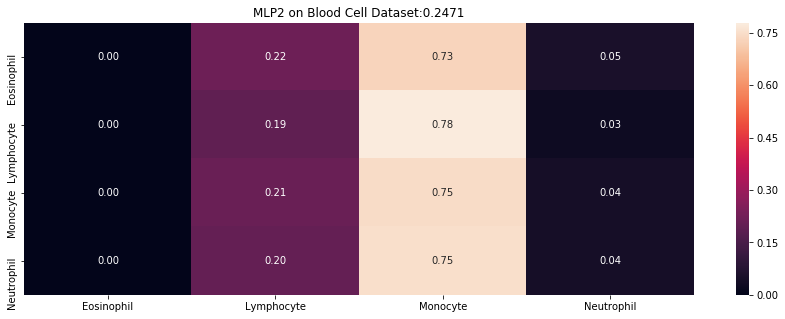

In [194]:
summarize_net(mlp, X_test1, y_test1, title_text='MLP2 on Blood Cell Dataset:')

Based on the MLP confusion matrix, the performance is very bad. most of images are treated as Monocyte.

Text(0.5, 1.0, 'MSE Loss')

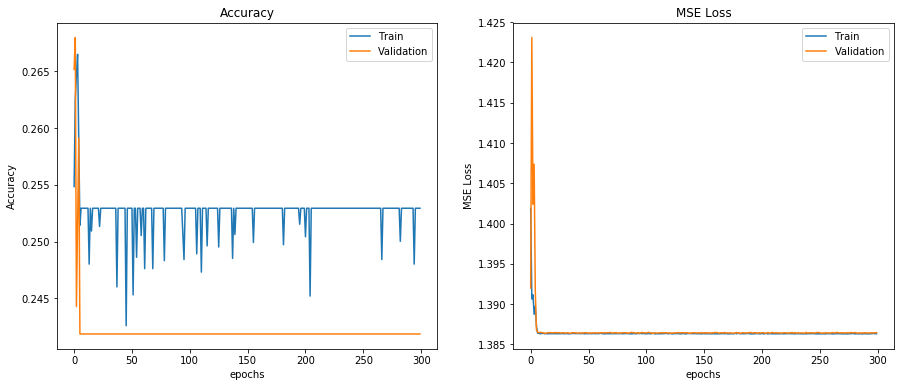

In [195]:
%matplotlib inline

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
p1, = plt.plot(history5.history['accuracy'])
p2, = plt.plot(history5.history['val_accuracy'])
plt.legend([p1, p2], ['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy')

#plt.ylabel('Recall %')
#plt.title('Training')
#plt.subplot(2,2,2)
#plt.plot(history.history['val_recall_21'])
#plt.title('Validation')

plt.subplot(1,2,2)
p3, = plt.plot(history5.history['loss'])
p4, = plt.plot(history5.history['val_loss'])
plt.legend([p3, p4], ['Train', 'Validation'])
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.title('MSE Loss')

## Statistical Comparison
With 95% confidence, perform the statistical test,that is, approximating the evaluation criterion as a binomial distribution and bounding by the variance. Based on the 95% CI we build, the 0 is not included in this CI. Therefore, there are strong evidence that the CNNs is better than MLP

In [209]:
#reject H0
evals5 = 0.2471
evals6 = 0.9771
e3 = evals6 - evals5
acc56 = (evals5 + evals6)/2
std56 = np.sqrt(acc56*(1-acc56)/(X_test.shape[0]*2))
print(e3-z*std56,e3+z*std56)


0.7164637082951599 0.74353629170484


## ROC curve

Based on ROC curve plot, it is obvious that Resnet is better performance than MLP

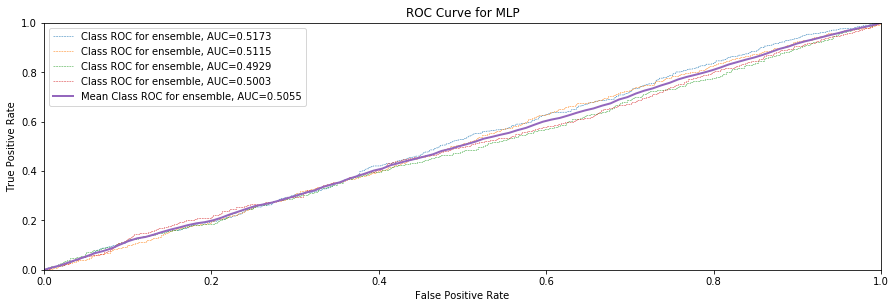

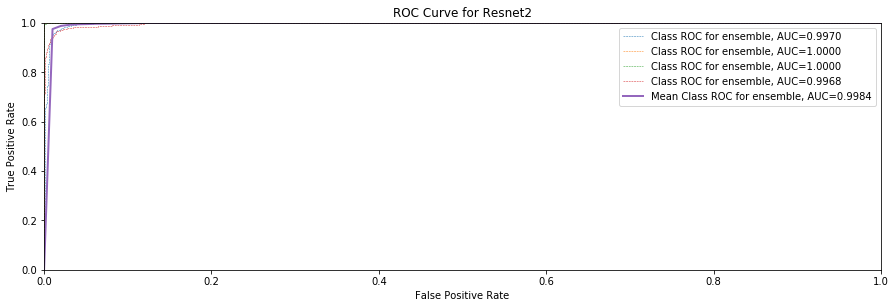

In [254]:
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics as mt
from keras.layers import concatenate
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


yhat_proba = mlp.predict(X_test1)
yhat_proba1 = resnet2.predict(X_test)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
classes = np.unique(y_test)
perclass_mean_tpr = 0.0
roc_auc = 0
for j in classes:
    fpr, tpr, thresholds = mt.roc_curve(y_test, yhat_proba[:, j], pos_label=j)
    perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
    perclass_mean_tpr[0] = 0.0
    roc_auc += mt.auc(fpr, tpr)
    plt.plot(fpr,tpr,'--',lw=.5,label='Class ROC for ensemble, AUC=%0.4f'
                     %(mt.auc(fpr, tpr)) )

perclass_mean_tpr /= len(classes)
roc_auc /= len(classes)
mean_tpr += perclass_mean_tpr

plt.plot(mean_fpr,perclass_mean_tpr,'-',lw=2,label='Mean Class ROC for ensemble, AUC=%0.4f'
                     %(roc_auc))
plt.legend(loc='best')
plt.title('ROC Curve for MLP')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
classes = np.unique(y_test)
perclass_mean_tpr = 0.0
roc_auc = 0
for j in classes:
    fpr, tpr, thresholds = mt.roc_curve(y_test, yhat_proba1[:, j], pos_label=j)
    perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
    perclass_mean_tpr[0] = 0.0
    roc_auc += mt.auc(fpr, tpr)
    plt.plot(fpr,tpr,'--',lw=.5,label='Class ROC for ensemble, AUC=%0.4f'
                     %(mt.auc(fpr, tpr)) )

perclass_mean_tpr /= len(classes)
roc_auc /= len(classes)
mean_tpr += perclass_mean_tpr

plt.plot(mean_fpr,perclass_mean_tpr,'-',lw=2,label='Mean Class ROC for ensemble, AUC=%0.4f'
                     %(roc_auc))
plt.legend(loc='best')
plt.title('ROC Curve for Resnet2')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()